<a href="https://colab.research.google.com/github/ChandrashekharGhanokar/laptop_price_predictor/blob/main/laptop_price_predictor_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gathering Dataset

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data set
df=pd.read_csv('/content/laptop_data.csv')

#Data Preprocessing

In [3]:
# shape of a data
df.shape

(1303, 12)

In [4]:
# five random rows of a dataframe
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
924,924,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.37kg,97236.0000
335,335,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.48kg,67559.0400
1292,1292,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1047,1047,MSI,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78kg,82351.6992
282,282,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,44169.1200


In [5]:
# display summary of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# statistical summary of a dataframe
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
# Count the number of missing (null) values in each column
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
# Count the number of duplicated rows
df.duplicated().sum()

0

In [9]:
# Remove the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
# Remove 'GB' from the 'Ram' column
df['Ram']=df['Ram'].str.replace('GB','')

In [11]:
# Convert the 'Ram' column to integer data type
df['Ram']=df['Ram'].astype('int')

In [12]:
# Remove 'kg' from the 'Weight' column
df['Weight']=df['Weight'].str.replace('kg','')

In [13]:
# Convert the 'Weight' column to float data type
df['Weight']=df['Weight'].astype('float')

In [14]:
# Convert the 'Price' column to integer data type
df['Price']=df['Price'].astype('int')

In [15]:
# Display a summary of the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 112.1+ KB


#Exploratory Data Analysis

<ipython-input-16-e6e8432f59b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

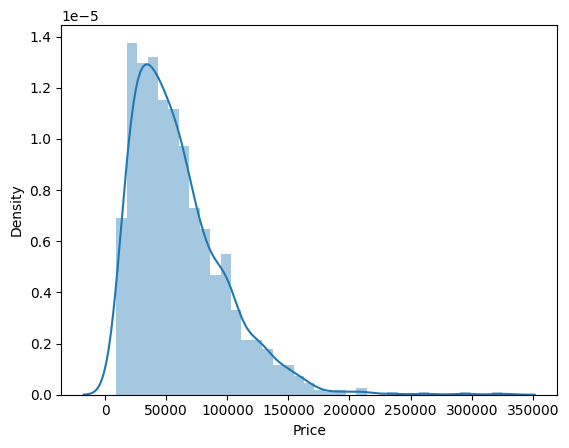

In [16]:
# Create a distribution plot for the 'Price' column
sns.distplot(df['Price'])

<Axes: >

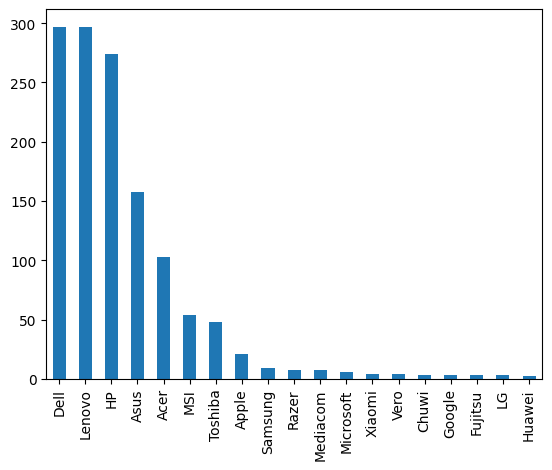

In [17]:
# Create a bar chart to visualize the frequency of each 'Company' in the DataFrame
df['Company'].value_counts().plot(kind='bar')

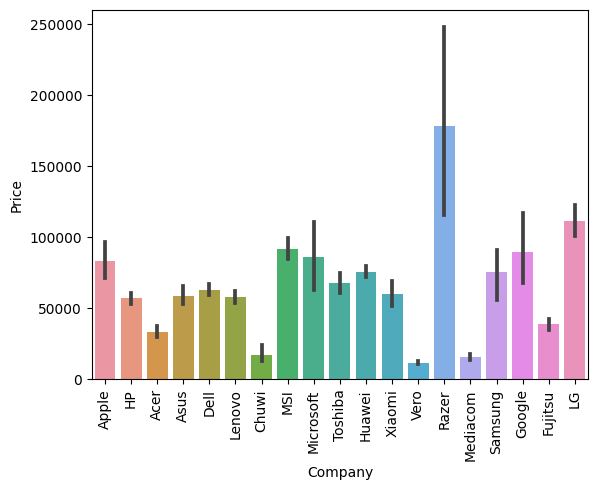

In [18]:
# Create a bar plot using Seaborn to visualize the relationship between 'Company' and 'Price'
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

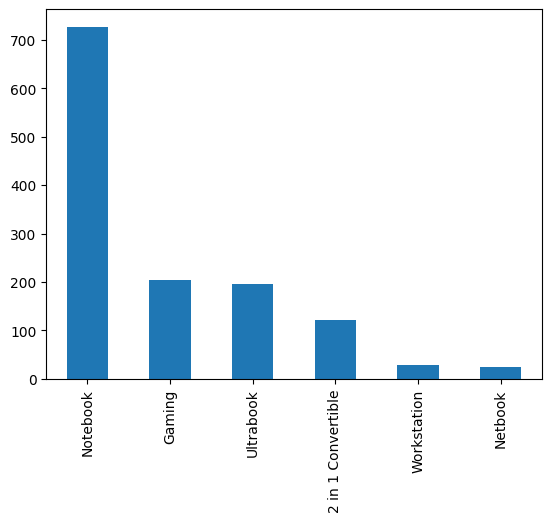

In [19]:
# Create a bar chart to visualize the frequency of each 'TypeName' in the DataFrame
df['TypeName'].value_counts().plot(kind='bar')

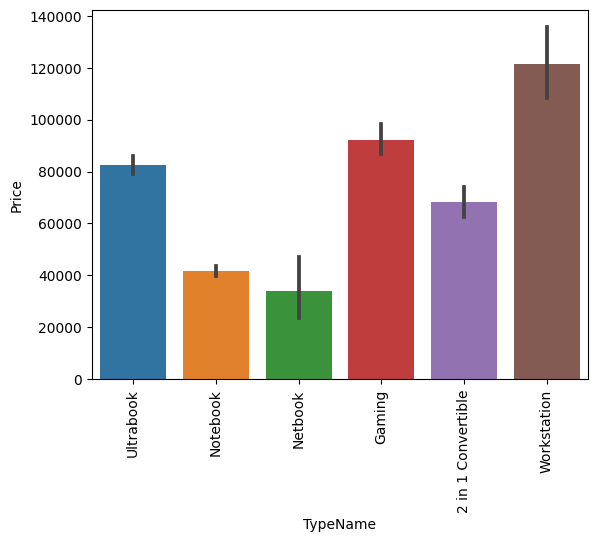

In [20]:
# Create a bar plot using Seaborn to visualize the relationship between 'TypeName' and 'Price'
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-21-7ce076e6c99b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

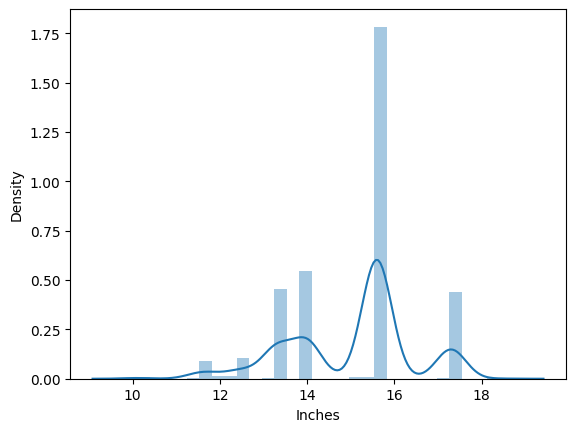

In [21]:
# Create a distribution plot for the 'Inches' column
sns.distplot(df['Inches'])

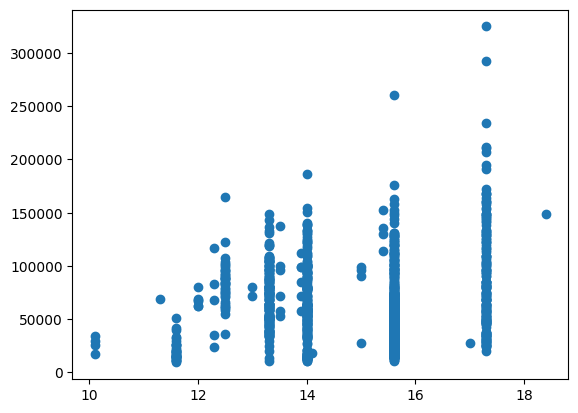

In [22]:
# Create a scatter plot to visualize the relationship between 'Inches' and 'Price'
plt.scatter(x=df['Inches'],y=df['Price'])

In [23]:
# Count the occurrences of each unique 'ScreenResolution' in the DataFrame
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

#Feature Engineering

In [24]:
# Create a new binary column 'Touchscreen' based on the presence of 'Touchscreen' in 'ScreenResolution'
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [25]:
# Randomly select and display 5 rows from the DataFrame 'df'
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1146,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.50GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,122381,0
1006,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,64202,0
29,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,47738,0
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017,0
1001,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,63349,0


<Axes: >

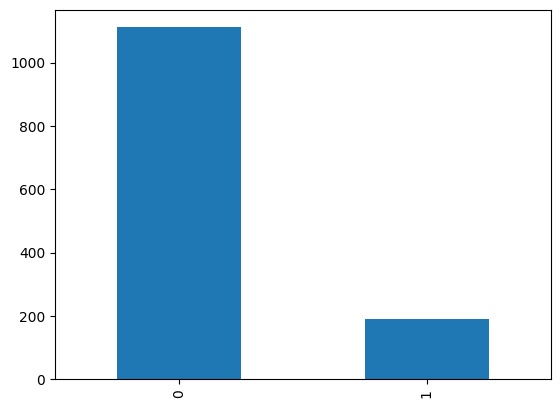

In [26]:
# Create a bar chart to visualize the distribution of 'Touchscreen' values
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

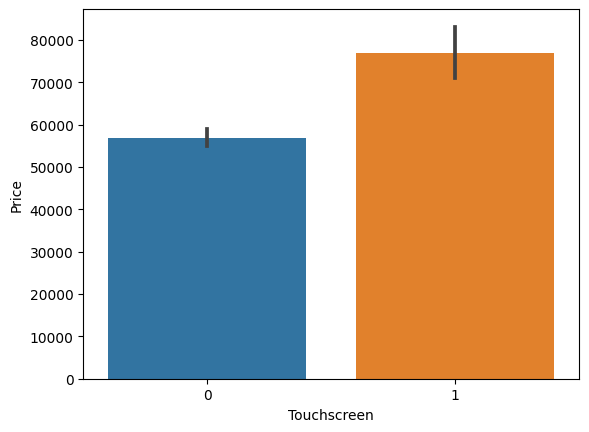

In [27]:
# Create a bar plot using Seaborn to visualize the relationship between 'Touchscreen' and 'Price'
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [28]:
# Create a new binary column 'IPS' based on the presence of 'IPS' in 'ScreenResolution'
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: >

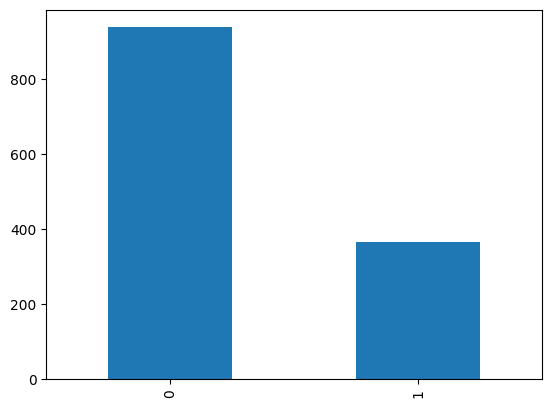

In [29]:
# Create a bar chart to visualize the distribution of 'IPS' values
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

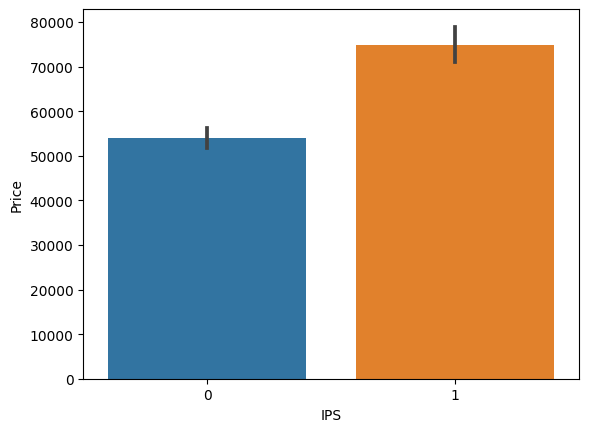

In [30]:
# Create a bar plot using Seaborn to visualize the relationship between 'IPS' and 'Price'
sns.barplot(x=df['IPS'],y=df['Price'])

In [31]:
# Split the 'ScreenResolution' column into two new columns using 'x' as the delimiter
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [32]:
# Create a new 'X_res' column to store the first part of the split 'ScreenResolution' values
df['X_res']=new[0]

In [33]:
# Create a new 'Y_res' column to store the second part of the split 'ScreenResolution' values
df['Y_res']=new[1]

In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,IPS Panel Retina Display 2560,1600


In [35]:
# Clean and extract numeric values from the 'X_res' column
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [36]:
# Convert the 'X_res' column to integer data type
df['X_res']=df['X_res'].astype('int')

In [37]:
# Convert the 'Y_res' column to integer data type
df['Y_res']=df['Y_res'].astype('int')

In [38]:
# Display a summary of the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int64  
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 152.8+ KB


In [39]:
# Calculate the 'ppi' (pixels per inch) and create a new column 'ppi' in the DataFrame
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [40]:
# Calculate the correlation between the 'Price' column and all other columns in the DataFrame 'df'
df.corr()['Price']

<ipython-input-40-66dbd6b8069f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068196
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252207
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [41]:
# Remove the 'ScreenResolution' column from the DataFrame 'df'
df.drop(columns=['ScreenResolution'],inplace=True)

In [42]:
# Remove the columns 'Inches', 'X_res', and 'Y_res' from the DataFrame 'df'
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [43]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005


In [44]:
# Count the occurrences of each unique CPU value in the DataFrame 'df'
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [45]:
# Create a new 'Cpu Name' column by extracting the first three words from the 'Cpu' column
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [46]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5


In [47]:
# Define a function to categorize CPU types into specific groups
# - If the CPU name is 'Intel Core i7', 'Intel Core i5', or 'Intel Core i3', keep it as is.
# - For other Intel processors, categorize them as 'Other Intel Processor.'
# - For all other processors, categorize them as 'AMD Processor.'
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [48]:
# Create a new 'Cpu brand' column by categorizing CPU names using the 'fetch_processor' function
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [49]:
# Randomly select and display 5 rows from the DataFrame 'df'
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu brand
1231,Razer,Gaming,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,186426,0,0,157.350512,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866,1,1,276.053530,Intel Core i7,Intel Core i7
1174,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,No OS,2.20,37775,0,0,141.211998,Intel Core i7,Intel Core i7
1184,HP,Notebook,Intel Core i7 6700HQ 2.6GHz,6,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.18,42570,0,1,141.211998,Intel Core i7,Intel Core i7
1192,HP,Notebook,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.86,25840,0,0,100.454670,Intel Core i5,Intel Core i5


<Axes: >

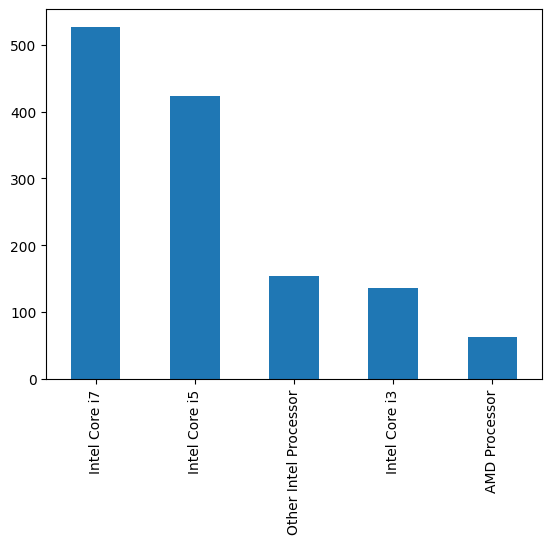

In [50]:
# Create a bar chart to visualize the distribution of CPU brands in the DataFrame
df['Cpu brand'].value_counts().plot(kind='bar')

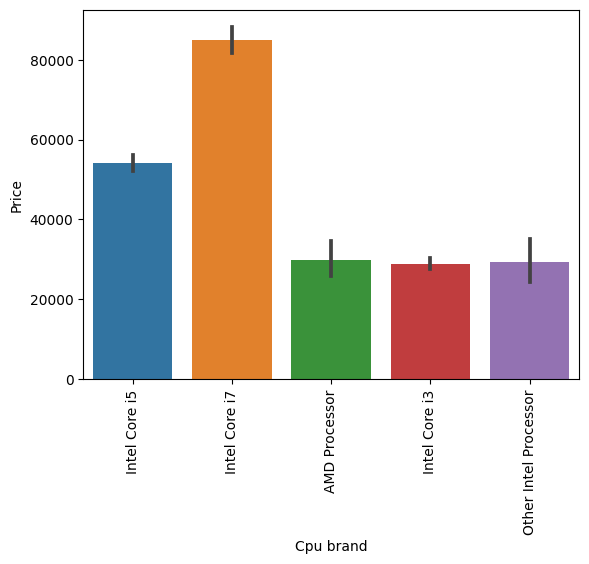

In [51]:
# Create a bar plot using Seaborn to visualize the relationship between 'Cpu brand' and 'Price'
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
# Remove the 'Cpu' and 'Cpu Name' columns from the DataFrame 'df'
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [53]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5


<Axes: >

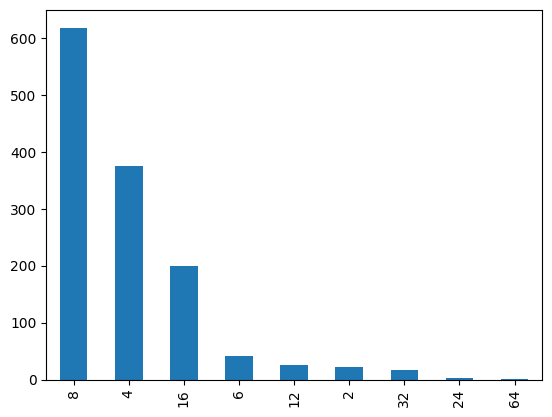

In [54]:
# Create a bar chart to visualize the distribution of RAM sizes in the DataFrame
df['Ram'].value_counts().plot(kind='bar')

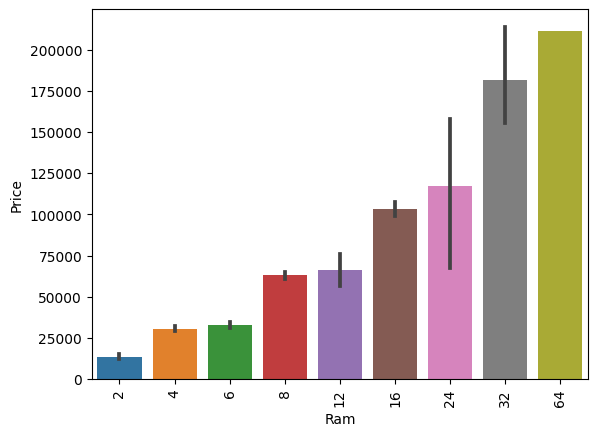

In [55]:
# Create a bar plot using Seaborn to visualize the relationship between 'Ram' and 'Price'
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
# Count the occurrences of each unique 'Memory' configuration in the DataFrame 'df'
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [57]:
# Clean and process the 'Memory' column:
# 1. Convert it to a string to ensure consistent data type.
# 2. Remove '.0' if present (from previous float conversion).
# 3. Remove 'GB' to standardize memory units.
# 4. Replace 'TB' with '000' to convert terabytes to gigabytes.
# 5. Split the 'Memory' values into two new columns using '+' as the delimiter.
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n=1, expand=True)

In [58]:
# Create a new 'first' column to store the first part of the split 'Memory' values
df["first"] = new[0]
df["first"] = df["first"].str.strip()

In [59]:
# Create a new 'second' column to store the second part of the split 'Memory' values
df["second"] = new[1]

In [60]:
# Create new columns based on the presence of keywords in the 'first' column:
# - 'Layer1HDD' is set to 1 if 'HDD' is in 'first', otherwise 0.
# - 'Layer1SSD' is set to 1 if 'SSD' is in 'first', otherwise 0.
# - 'Layer1Hybrid' is set to 1 if 'Hybrid' is in 'first', otherwise 0.
# - 'Layer1Flash_Storage' is set to 1 if 'Flash Storage' is in 'first', otherwise 0.
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [61]:
# Clean the 'first' column by removing all non-numeric characters
df['first'] = df['first'].str.replace(r'\D', '')

<ipython-input-61-2ce19b9d8739>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')


In [62]:
# Replace missing values in the 'second' column with '0'
df["second"].fillna("0", inplace=True)

In [63]:
# Create new columns based on the presence of keywords in the 'second' column:
# - 'Layer2HDD' is set to 1 if 'HDD' is in 'second', otherwise 0.
# - 'Layer2SSD' is set to 1 if 'SSD' is in 'second', otherwise 0.
# - 'Layer2Hybrid' is set to 1 if 'Hybrid' is in 'second', otherwise 0.
# - 'Layer2Flash_Storage' is set to 1 if 'Flash Storage' is in 'second', otherwise 0.
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [64]:
# Clean the 'second' column by removing all non-numeric characters
df['second'] = df['second'].str.replace(r'\D', '')

<ipython-input-64-c7af5d9e318b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [65]:
# Convert the 'first' column to integer data type
df["first"] = df["first"].astype(int)

In [66]:
# Convert the 'second' column to integer data type
df["second"] = df["second"].astype(int)

In [67]:
# Calculate new columns for different storage types by combining 'first' and 'second' columns
# The calculations are based on the presence of specific storage layers ('Layer1' and 'Layer2')
# - 'HDD' column sums up HDD storage from both layers.
# - 'SSD' column sums up SSD storage from both layers.
# - 'Hybrid' column sums up Hybrid storage from both layers.
# - 'Flash_Storage' column sums up Flash Storage from both layers.
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

In [68]:
# Remove multiple columns from the DataFrame 'df'
# The columns being dropped include storage-related columns and intermediate columns used for calculations
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)

In [69]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
537,HP,Notebook,4,256 SSD,Intel HD Graphics 405,Windows 10,1.86,21258,0,0,141.211998,Other Intel Processor,0,256,0,0
1239,Lenovo,Notebook,16,512 SSD,Intel HD Graphics 620,Windows 10,1.40,79866,0,1,165.632118,Intel Core i7,0,512,0,0
1201,Lenovo,Notebook,8,500 HDD,Nvidia GeForce 920MX,No OS,2.20,33513,0,0,100.454670,Intel Core i7,500,0,0,0
366,Dell,Notebook,8,128 SSD + 1000 HDD,AMD Radeon 530,Windows 10,2.80,57808,0,0,127.335675,Intel Core i5,1000,128,0,0
1229,MSI,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,61218,0,0,141.211998,Intel Core i7,1000,128,0,0


In [70]:
# Remove the 'Memory' column from the DataFrame 'df'
df.drop(columns=['Memory'],inplace=True)

In [71]:
# Calculate the correlation between the 'Price' column and all other columns in the DataFrame 'df'
df.corr()['Price']

<ipython-input-71-66dbd6b8069f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252207
ppi              0.473487
HDD             -0.096442
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [72]:
# Remove the 'Hybrid' and 'Flash_Storage' columns from the DataFrame 'df'
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [73]:
# Count the occurrences of each unique GPU (Graphics Processing Unit) value in the DataFrame 'df'
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [74]:
# Create a new 'Gpu brand' column by extracting the GPU brand from the 'Gpu' column
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [75]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel


In [76]:
# Count the occurrences of each unique GPU brand in the DataFrame 'df'
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

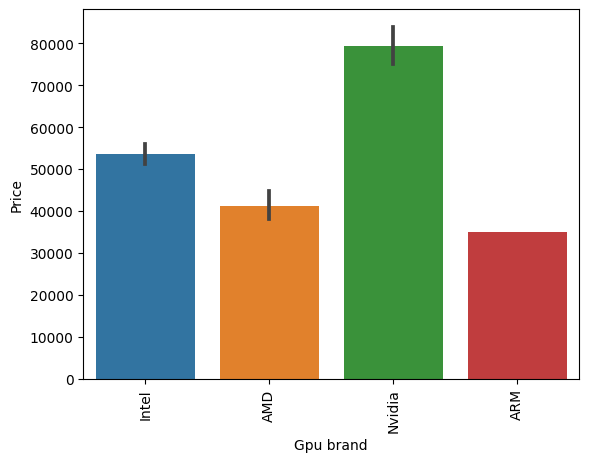

In [77]:
# Create a bar plot using Seaborn to visualize the relationship between 'Gpu brand' and 'Price'
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [78]:
# Remove the 'Gpu' column from the DataFrame 'df'
df.drop(columns=['Gpu'],inplace=True)

In [79]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel


In [80]:
# Count the occurrences of each unique operating system (OpSys) value in the DataFrame 'df'
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

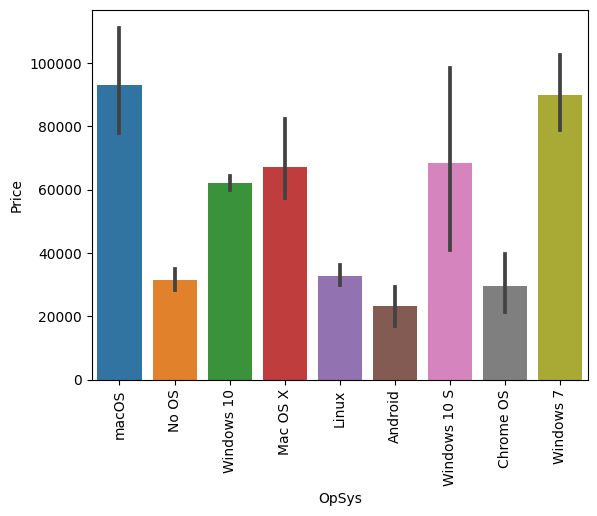

In [81]:
# Create a bar plot using Seaborn to visualize the relationship between 'OpSys' and 'Price'
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [82]:
# Define a function to categorize operating systems (OpSys) into broader categories
# - If OpSys is 'Windows 10', 'Windows 7', or 'Windows 10 S', categorize as 'Windows'.
# - If OpSys is 'macOS' or 'Mac OS X', categorize as 'Mac'.
# - Otherwise, categorize as 'Others/No OS/Linux'.def cat_os(inp):
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [83]:
# Create a new 'os' column by categorizing operating systems (OpSys) using the 'cat_os' function
df['os'] = df['OpSys'].apply(cat_os)

In [84]:
# Remove the 'OpSys' (operating system) column from the DataFrame 'df'
df.drop(columns=['OpSys'],inplace=True)

In [85]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


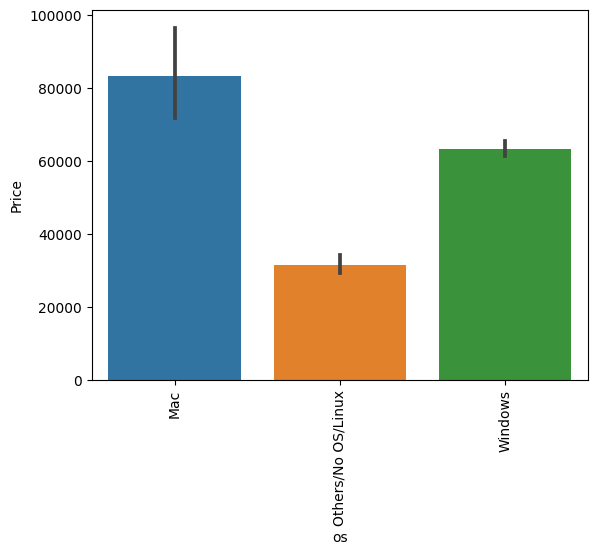

In [86]:
# Create a bar plot using Seaborn to visualize the relationship between 'os' and 'Price'
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-87-f7a6763238af>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

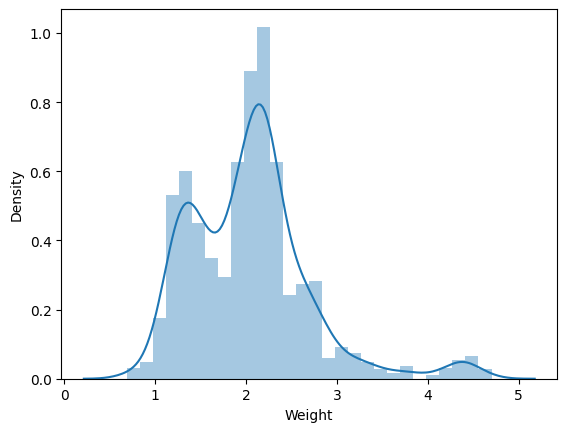

In [87]:
# Create a distribution plot using Seaborn to visualize the distribution of device weights ('Weight')
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

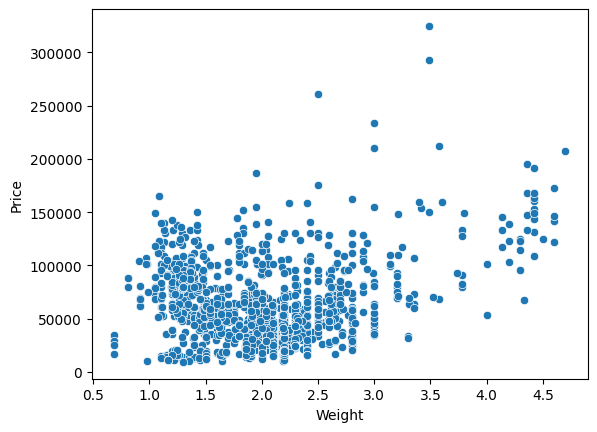

In [88]:
# Create a scatter plot using Seaborn to visualize the relationship between 'Weight' and 'Price'
sns.scatterplot(x=df['Weight'],y=df['Price'])

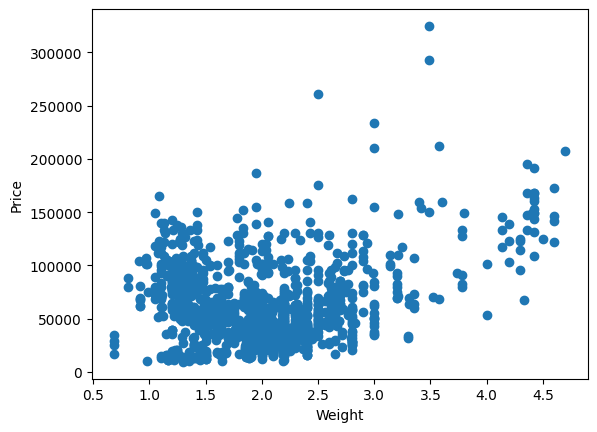

In [89]:
# Create a scatter plot using Matplotlib to visualize the relationship between 'Weight' and 'Price'
plt.scatter(x=df['Weight'],y=df['Price'])
plt.xlabel('Weight')
plt.ylabel('Price')
plt.show()

In [90]:
# Calculate the correlation between the 'Price' column and all other columns in the DataFrame 'df'
df.corr()['Price']

<ipython-input-90-66dbd6b8069f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252207
ppi            0.473487
HDD           -0.096442
SSD            0.670799
Name: Price, dtype: float64

<ipython-input-91-2ffd8afc28af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

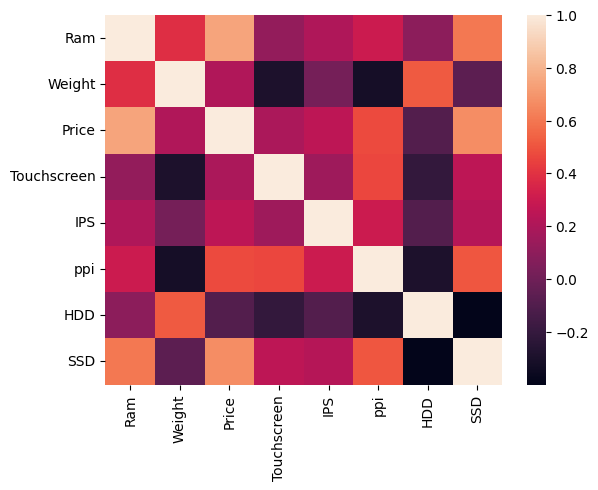

In [91]:
# Create a heatmap using Seaborn to visualize the correlation matrix of the DataFrame 'df'
sns.heatmap(df.corr())

#Model Fitting

<ipython-input-92-b34dc45a8119>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

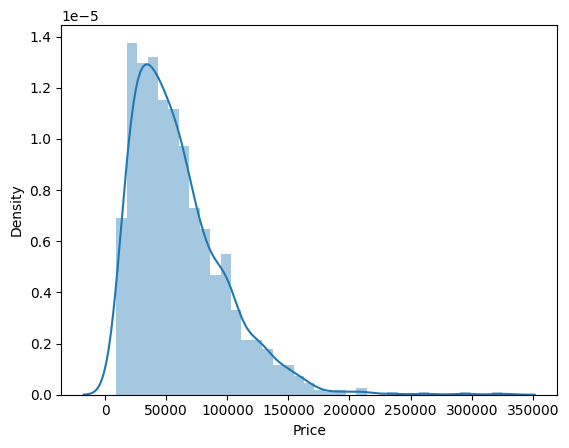

In [92]:
# Create a distribution plot using Seaborn to visualize the distribution of 'Price'
sns.distplot(df['Price'])

<ipython-input-93-d9547fa675b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

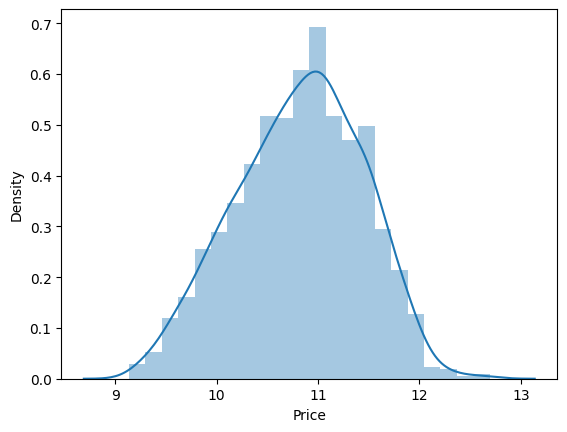

In [93]:
# Create a distribution plot using Seaborn to visualize the distribution of log-transformed 'Price'
sns.distplot(np.log(df['Price']))

In [94]:
# 'x' contains all columns except 'Price,' which are used as features.
x=df.drop(columns=['Price'])

In [95]:
# 'y' contains the log-transformed 'Price' column, which is the target variable for regression tasks.
y=np.log(df['Price'])

In [96]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [97]:
y

0       11.175745
1       10.776766
2       10.329931
3       11.814473
4       11.473093
          ...    
1298    10.433880
1299    11.288106
1300     9.409273
1301    10.614106
1302     9.886341
Name: Price, Length: 1303, dtype: float64

In [98]:
# Split the dataset into training and testing sets using scikit-learn's train_test_split function
from sklearn.model_selection import train_test_split

In [99]:
# 'x_train' and 'y_train' contain the features and target variable for training.
# 'x_test' and 'y_test' contain the features and target variable for testing.
# The data is divided into an 80% training set and a 20% testing set.
# 'random_state' is set to 2 for reproducibility.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [100]:
x_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
91,Acer,Notebook,8,2.20,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
940,HP,Gaming,8,2.75,0,1,127.335675,Intel Core i5,1000,128,Nvidia,Windows
1026,HP,Notebook,4,2.31,0,0,111.935204,Intel Core i5,500,0,Intel,Windows
1257,Dell,Notebook,4,2.29,0,0,100.454670,Intel Core i3,500,0,Intel,Windows
487,Dell,Notebook,16,2.06,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [101]:
y_train

91      10.510777
940     11.219064
1026    11.056414
1257    10.169959
487     11.524637
          ...    
466     10.126151
299     11.267217
493     10.336860
527     10.104590
1192    10.159679
Name: Price, Length: 1042, dtype: float64

In [102]:
# Import necessary libraries for building machine learning pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [103]:
# Import the Linear Regression model from scikit-learn
from sklearn.linear_model import LinearRegression

In [104]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [105]:
# Define a ColumnTransformer for data preprocessing:
# - 'col_tnf' transformer applies One-Hot Encoding to select columns.
# - One-Hot Encoding is configured with 'sparse=False' to create dense arrays and 'drop='first'' to drop the first category to avoid multicollinearity.
# - Columns at positions [0, 1, 7, 10, 11] will be transformed using One-Hot Encoding.
# - 'remainder='passthrough'' specifies that all other columns should be included without transformation.
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

In [106]:
# Define a Linear Regression model for predictive modeling
step2=LinearRegression()

In [107]:
# Create a machine learning pipeline composed of multiple steps:
# - 'step1': Data preprocessing step, including One-Hot Encoding of specific columns.
# - 'step2': Linear Regression model for predictive modeling.
pipe=Pipeline([
               ('step1',step1),
                ('step2',step2)
               ])

In [108]:
# Fit the machine learning pipeline to the training data
# - 'pipe' is the pipeline that includes data preprocessing and the Linear Regression model.
# - 'x_train' contains the training features.
# - 'y_train' contains the target variable for training.
pipe.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', LinearRegression())])

In [109]:
# Make predictions using the trained machine learning pipeline on the test data
# - 'pipe' is the pipeline that includes data preprocessing and the Linear Regression model.
# - 'x_test' contains the test features.
# - 'y_pred' will contain the predicted values.
y_pred=pipe.predict(x_test)

In [110]:
print('R2 score',r2_score(y_test,y_pred))

R2 score 0.8236397753923215


In [111]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 0.20246516968057598


In [112]:
# Save the DataFrame and the machine learning pipeline as pickle files for future use
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))